In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd


2022-11-24 03:21:54.527516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 03:21:54.527575: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
#check if data contains NaN values
data.isnull().values.any()

False

In [4]:
#Normalization
normalized_data = (data-data.min())/(data.max()-data.min())


In [5]:
#split data into train-,test- and valifdationset
train, validate, test = np.split(normalized_data.sample(frac=1), [int(.6*len(normalized_data)), int(.8*len(normalized_data))])


In [17]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(13,), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(1,activation='linear')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])


In [7]:

X_train = train.drop(labels='MEDV',axis=1).values
y_train = train['MEDV'].values

X_test = test.drop(labels='MEDV',axis=1).values
y_test = test['MEDV'].values


In [18]:

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
history = model.fit(X_train,y_train,batch_size=40,epochs=170,validation_data=(X_test, y_test),verbose=0,callbacks=[callback])

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)


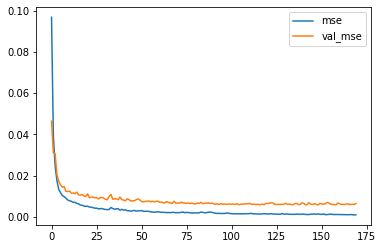

In [19]:
history_df[['mse','val_mse']].plot();


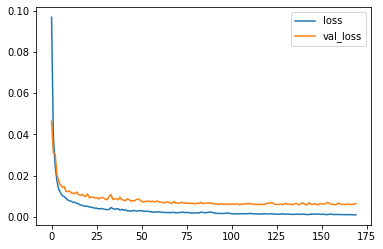

In [20]:
history_df[['loss','val_loss']].plot();


In [22]:
X_validate = validate.drop(labels='MEDV',axis=1).values
y_validate = validate['MEDV'].values

results = model.evaluate(X_validate, y_validate, batch_size=30)
print("test loss, test mae:", results)

4/4 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0030
test loss, test mae: [0.0030040540732443333, 0.0030040538404136896]
